# Lecture 1 Introduction to Data Science

## What is Data Science?

Three correlated concepts: 
- Data Science
- Artificial Intelligence 
- Machine Learning

[Battle of the Data Science Venn Diagrams ](https://www.kdnuggets.com/2016/10/battle-data-science-venn-diagrams.html)

The original Venn diagram from Drew Conway:

<div>
<img src="./img/Data_Science_VD.png" width="300">
</div>

Another diagram from Steven Geringer:

<div>
<img src="./img/moz-screenshot-3-729576.png" width="400">
</div>

Another version:

<div>
<img src="./img/1_-XKVI5SAEpffNR7BusdvNQ.png" width="300">
</div>

Perhaps the reality should be:
<div>
<img src="./img/DataScienceDisciplines.png" width="400">
</div>
<div>
<img src="./img/tumblr_m74i4eR9Ym1qa0uujo1_1280.jpg" width="300">
</div>

[David Robinson's Auto-pilot example](http://varianceexplained.org/r/ds-ml-ai/):
- machine learning: **predict** whether there is a stop sign in the camera
- artificial intelligence: design the **action** of applying brakes (either by rules or from data)
- data science: provide the **insights** why the system does not work well after sunrise

**Peijie's Definition**:
Data Science is the science 
- *of* the data -- what
- *by* the data -- how
- *for* the data -- why

## Mathematics of Data 

### Representation of Data

What data do we have, and how to relate it with math objects?

#### **Tabular Data**

In [1]:
import pandas as pd
import numpy as np
df_house = pd.read_csv('./data/kc_house_data.csv')
print(df_house.shape)
df_house.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- A structured data table, with $n$ observations and $p$ variables.
- **Mathematical representation**: The data *matrix* $X\in\mathbb{R}^{n\times p}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(n)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th observation, $\mathbf{x}^{(i)}=(x_{1}^{(i)},\dots,x_{p}^{(i)})\in\mathbb{R}^{p}$.</center>
    
- [Example: Precision Medicine and Single-cell Sequencing.](https://learn.gencore.bio.nyu.edu/single-cell-rnaseq/)
<div>
<img src="./img/scRNA-overview.jpg" width="400">
</div>

- *Roughly speaking*, big data -- large $n$, high-dimensional data -- large $p$.

#### **Time-series Data**

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


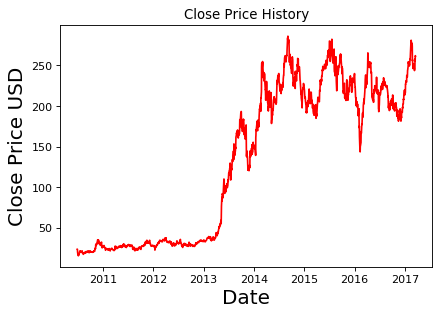

In [3]:
import matplotlib.pyplot as plt
ts_tesla = pd.read_csv('./data/Tesla.csv')
print(ts_tesla.head())

ts_tesla['Date'] = pd.to_datetime(ts_tesla['Date'])
ts_tesla.set_index('Date',inplace=True)

# Suppose we only focus on the time-series of close price
plt.figure(dpi=80)
plt.title('Close Price History')
plt.plot(ts_tesla['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()
# this is only about tesla -- we can also have the time-series of apple,amazon,facebook...

- Simple case: $N$ one-dimensional trajectories with each sampled at $T$ time points.
- **Mathematical representation I**: Still use the data *matrix* $X\in\mathbb{R}^{N\times T}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(N)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th trajectory, $\mathbf{x}^{(i)}=(x_{1}^{(i)},\dots,x_{T}^{(i)})\in\mathbb{R}^{T}$.
</center>
- Question: The difference with tabular data?
- **Mathematical representation II**: Each trajectory is a *function* of time $t$. The whole dataset can be represented as $z=f(\omega,t)$ where $\omega$ represents the sample and $t$ represents the time. In probability theory, this is called *stochastic process*.
    - For fixed $\omega$, we have a trajectory, which is the function of time. 
    - For fixed $t$, we obtain an ensemble drawn from random distribution. 
- Question: How about $N$ $d$-dimensional trajectories with each sampled at $T$ time points?
- [Example: Electroencephalography (EEG) data and Parkinson's disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3858815/).
<div>
<img src="./img/3-Figure1-1.png" width="600">
</div>

#### **Images**

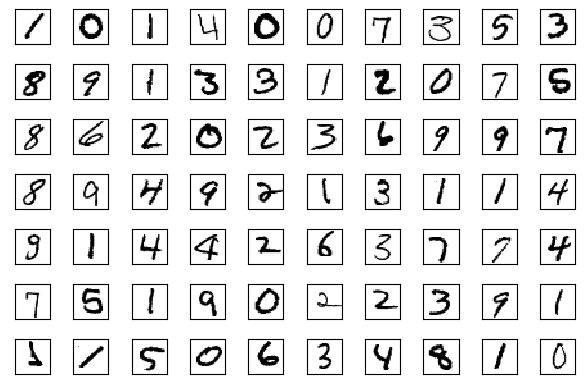

In [8]:
mnist = pd.read_csv('./data/train.csv')
target = mnist['label']
mnist = mnist.drop("label",axis=1)
plt.figure(dpi=100)
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = mnist.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none",cmap='gray_r', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

- Simple case: N grayscale images with $m\times n$ pixels each.
- **Mathematical Representation I**: Each image can be represented by a matrix $I\in\mathbb{R}^{m\times n}$, whose elements denotes the intensities of pixels. The whole datasets have $N$ matrices of $m$ by $n$, or represented by a $N\times m\times n$ *tensor*.

[Illustrated Introduction to Linear Algebra using NumPy](https://medium.com/@kaaanishk/illustrated-introduction-to-linear-algebra-using-numpy-11d503d244a1)
<div>
<img src="./img/1_hd0aMCRIDbyFQo5lYgb5Fw.jpeg" width="400" >
</div>

- **Mathematical representation II**: *Random field model* $z=\mathbf{f}(\omega,x,y)$.
- Color images: Decompose into RGB (red,green and blue) channels and 
    - use three matrices (or three-dimensional tensor) to represent one image, or 
    - build the random field model with vector-valued functions $z=\mathbf{f}(\omega,x,y)\in \mathbb{R}^{3}$
    
[convolutional neural networks](https://www.esantus.com/blog/2019/1/31/convolutional-neural-networks-a-quick-guide-for-newbies)

<div>
<img src="./img/conv_rgb.png" width="400">
</div>
- Question: Can image datasets also be transformed into tabular data? What are the pros/cons?

In [37]:
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Videos**

- *Time-series* of images, or *random field* model $z=\mathbf{f}(\omega,x,y,t)$

#### **Texts**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['He is a good person',
          'He is bad student',
          'He is hardworking']
df = pd.DataFrame(data=corpus, columns=['sentences'])
print(df)
vectorizer = CountVectorizer(vocabulary=['he', 'is', 'a', 'good', 'person', 'bad', 'student', 'hardworking'], min_df=0,
                             stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(df['sentences'].values)
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
result.head()

             sentences
0  He is a good person
1    He is bad student
2    He is hardworking


,he,is,a,good,person,bad,student,hardworking
0,1,1,1,1,1,0,0,0
1,1,1,0,0,0,1,1,0
2,1,1,0,0,0,0,0,1


- **Proposal I**: Tabular data by extracting key words. "Document-Term Matrix"
    - useful in sentiment analysis, document clustering, topic modelling
    - popular algorithms include tf-idf,Word2Vec,bag of words, etc.
- **Proposal II**: Time-series of individual words.
    - useful in machine translation
    
[Recurrent neural network model for machine translations](https://smerity.com/articles/2016/google_nmt_arch.html)

<div>
<img src="./img/gnmt_arch_1_enc_dec.svg" width="500">
</div>

#### **Networks**

- Concepts: node/edge/weight, directed/undirected
- **Mathematical Representation**: adjacency matrix
- Question: what about the whole datasets of networks, and time-evolving networks?

### Tasks with Data: Machine Learning

The tasks with data can often be transfromed into *machine learning* problems, which can be generally classified as:
- Supervised Learning -- "learning with training";
- Unsupervised Learning -- "learning without training";
- Reinforment Learning -- "learning by doing".

Our course will focus on the first two categories.

#### **Supervised Learning**

- Given the *training dataset* $(x^{(i)},y^{(i)})$ with $y^{(i)}\in \mathbb{R}^{q}$ denotes the *labels*, the supervised learning aims to find a mapping $\mathbf{f}:\mathbb{R}^{p}\to\mathbb{R}^{q}$ such that $y^{(i)}\approx\mathbf{f}(x^{(i)})$. Then with a new observation $x^{(new)}$, we can predict that $y^{(new)}=\mathbf{f}(x^{(new)})$.

    - when $y\in\mathbb{R}$ is continuous, the problem is also called as *regression*. **Example**: Housing price prediction
    - when $y\in\mathbb{R}$ is discrete, the problem is also called as *classification*. **Example**: Handwritten digit recognization

- **Practical Strategy**: Limit the mapping $\mathbf{f}$ to certain space by parametrization $\mathbf{f(x;\theta)}$. Then define the loss function of $\theta$
<center>$L(\theta)=\sum\limits_{i=1}^{n}\ell(y^{(i)},\mathbf{f}(x^{(i)})),$ </center> where $\ell$ quantifies the "distance" between $y^{(i)}$ and $\mathbf{f}(x^{(i)})$, and a common choice is mean squre error (MSE) for continous data $\ell(y^{(i)},\mathbf{f}(x^{(i)}))=||y^{(i)}-\mathbf{f}(x^{(i)})||^{2}$. We then seek to choose the optimal $\theta$ that minimizes the loss function<center>$\theta^{*}=\mathop{\mathrm{argmin}}\limits_{\theta}L(\theta),$</center>
which can be tacked numeracally by optimzation methods (including the popular stochastic gradient descent).

- Difference choice of $\mathbf{f(x;\theta)}$ leads to various supervised learning models:
    - Linear function : Linear/Logistic Regression
    - Composition of linear + nonlinear functions: Neural Network

#### **Unsupervised Learning**

It is still challenging to give a general and rigorous defination for unsupervised learning mathematically. Let's focus on more specific tasks.

- Dimension Reducion
  
    Given $X\in \mathbb{R}^{n\times p}$, finding a mapping function $\mathbf{f}:\mathbb{R}^{p}\to \mathbb{R}^{q} (q\ll p)$ such that the low-dimensional coordinates $z^{(i)}=\mathbf{f}(x^{(i)})$ "preserve the information" about $x^{(i)}$.
  - Question: Difference with supervised learning?
  - Linear mapping: Principle Component Analysis (PCA)
  - Nonlinear mapping: Manifold Learning, Autoencoder

- Clustering

    Given $X\in \mathbb{R}^{n\times p}$, finding a partition of the dataset into $K$ groups such that 
    - data within the same group are similiar;
    - data from different groups are dissimiliar.